### Amazon review model

DSEMT group 3 Final Project Part 2:
                                  - Navin Sharma 002737702
                                  - Shreya Deshpande 001002875
                                  - Koushal Sai Amshala 002772702
                                  - Parjita Munshi 002761776

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
#load the preprocessed data 
data=pd.read_csv('E:\Data Science\Final_Project/reviews.csv' )

In [ ]:
data.head()
data.drop_duplicates(inplace=True)

In [ ]:
data['text'].isnull().values.any()
data['rating'].isnull().values.any()

False

In [ ]:
#use preprocessed_reviews and score for building a model
X=data['text'].values.astype('U')
Y=data['rating'].values.astype('U')

In [ ]:
print(X.shape)
print(Y.shape)

(5000,)
(5000,)


In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3500,) (3500,)
(1500,) (1500,)


In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer()
X_train_Bow=Vect.fit_transform(X_train)
X_test_Bow=Vect.transform(X_test)
print(X_train_Bow.shape,Y_train.shape)
print(X_test_Bow.shape,Y_test.shape)

(3500, 3965) (3500,)
(1500, 3965) (1500,)


In [ ]:
X_train=X_train_Bow
X_test=X_test_Bow

In [ ]:
from sklearn import preprocessing
y = preprocessing.label_binarize(Y_train, classes=[0, 1, 2, 3])

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
from sklearn import preprocessing
y = preprocessing.label_binarize(Y_test, classes=[0, 1, 2, 3])

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#hyperparameter tuning for find optimal_K
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import math

C:\Users\parjita\AppData\Local\Temp\ipykernel_30208\4283304283.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Grid Search Cross validation for hyper_parameter tuning
def Grid_search(X_train,Y_train):
    cv=KFold(n_splits=5) #defining the K-fold cross validation
    alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    model=MultinomialNB()
    parameters = {'alpha':alpha_values}
    clf = GridSearchCV(model,parameters, cv=cv, return_train_score=True,verbose=1)
    clf.fit(X_train, Y_train)
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_alpha'])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_alpha= clf.best_params_['alpha']
    
    sns.set()
    alpha_values=[math.log(x) for x in alpha_values]
    plt.plot(alpha_values, train_auc, label='Train AUC')

    plt.gca().fill_between(alpha_values,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(alpha_values, cv_auc, label='CV AUC')
  
    plt.gca().fill_between(alpha_values,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(alpha_values, train_auc, label='Train AUC points')
    plt.scatter(alpha_values, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("alpha_values: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best alpha from gridsearch :',best_alpha)
    return  best_alpha

Fitting 5 folds for each of 11 candidates, totalling 55 fits


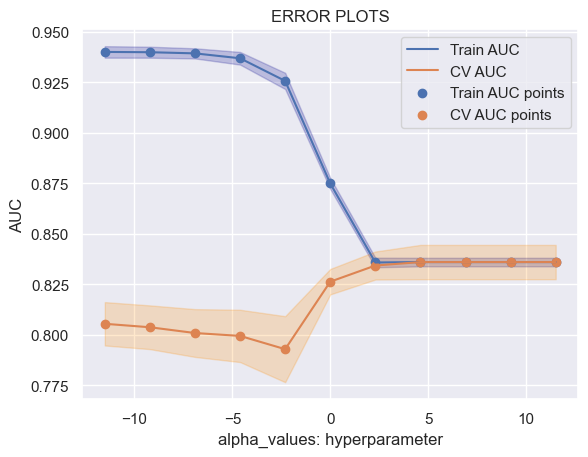

Best cross-validation score: 0.836
The best alpha from gridsearch : 100


In [ ]:
#finding the best alpha using grid serach
#we are already defined a function juct call it now
best_alpha=Grid_search(X_train,Y_train)

In [ ]:
#best alpha by grid search hyper parameter tuning
best_alpha

100

In [ ]:
# Top 10 important features of positive class 
feature_names=Vect.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[1], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Positive Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")

In [ ]:
# Top 10 important features of Negative class 
feature_names=Vect.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[0], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Negative Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")

In [ ]:
data.text.head()

0    Kids hats no longer fit, so we were searching ...
1    This Carhartt Men's Knit Cuffed Beanie seems t...
2    I want to start by saying this beanie is NOT t...
3    As a fairly small-headed woman, this thing is ...
4    This is my 2nd purchase of this hat, however, ...
Name: text, dtype: object

In [ ]:
review_example = data.text[2031]
review_example

'Love the fit & the look! It is my second purchase'

In [ ]:
import re
review_example = re.sub("[^a-zA-Z]",'',review_example)
review_example

'LovethefitthelookItismysecondpurchase'

In [ ]:
rt = lambda x : re.sub("[^a-zA-Z]",'',str(x))
data["text"] = data["text"].map(rt)
data["text"] = data["text"].str.lower()
data.head()

,id,profileName,text,date,title,rating,images,helpful,Size,Color
0,RRNW8O8WKON3S,Tabby Katt,kidshatsnolongerfitsoweweresearchingforanewwin...,"Reviewed in the United States on December 7, 2022",Little brother loves it!,5,NaN,3,One Size,Cadmium Green/Shadow Marl
1,R2H354V80I4Z9J,Redpawn3,thiscarharttmensknitcuffedbeanieseemstobequali...,"Reviewed in the United States on November 23, ...","Smaller than desired on large, big, larger, bi...",4,NaN,37,One Size,Black
2,R10JKN5868NJ7X,Drea,iwanttostartbysayingthisbeanieisnottightlikeso...,"Reviewed in the United States on December 9, 2022",Best beanie!,5,NaN,2,One Size,Black
3,RLZGCROKH1BY6,M,asafairlysmallheadedwomanthisthingisawesomeilo...,"Reviewed in the United States on November 19, ...",Men’s… pifft,5,NaN,12,One Size,North Woods
4,RMCSIE5V8PXV3,KccaseyK,thisismyndpurchaseofthishathoweveriwilltellyou...,"Reviewed in the United States on October 31, 2015",Very comfortable and warm. Extra length to pro...,5,NaN,57,One Size,Black


In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
Y_predict_train = NB_classifier.predict(X_train)
Y_predict_train

array(['5', '5', '5', ..., '5', '5', '5'], dtype='<U1')

<AxesSubplot:>

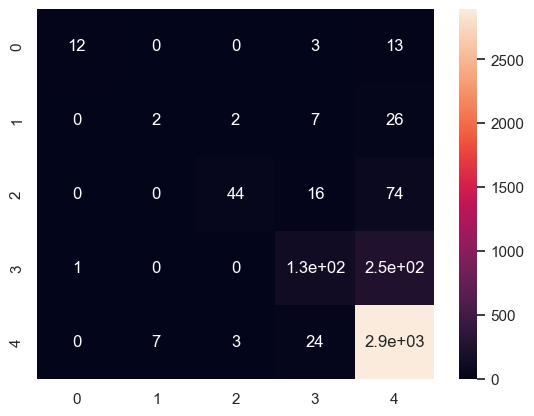

In [ ]:
cm = confusion_matrix(Y_train, Y_predict_train)
sns.heatmap(cm,annot=True)

<AxesSubplot:>

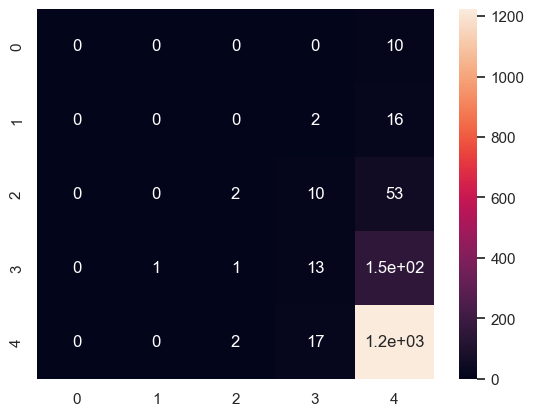

In [ ]:
Y_predict_test = NB_classifier.predict(X_test)
Y_predict_test
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        18
           3       0.40      0.03      0.06        65
           4       0.31      0.08      0.13       165
           5       0.84      0.98      0.91      1242

    accuracy                           0.83      1500
   macro avg       0.31      0.22      0.22      1500
weighted avg       0.75      0.83      0.77      1500



C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy {}%'.format( 100 * accuracy_score(Y_predict_test,Y_test)))

Accuracy 82.53333333333333%
